In [1]:
import numpy as np
import pandas as pd
import pickle
#from build_database import flux_obj
from scipy import interpolate
import matplotlib.pyplot as plt
import os
import itertools
import random
import os
import time
import datetime
import gzip
import matplotlib.gridspec as gridspec

from spacepy import coordinates as coord
from spacepy.time import Ticktock

from methods.raytracer_utils import readdump, read_rayfile, read_rayfiles
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as gridspec


import methods.xflib as xflib

from methods.index_helpers import load_TS_params
from methods.index_helpers import load_Dst
from methods.index_helpers import load_Kp
from methods.index_helpers import load_ae
from methods.index_helpers import Kp_at
from methods.index_helpers import Ae_at

xf = xflib.xflib(lib_path='/shared/users/asousa/WIPP/Thesis figures/methods/libxformd.so')

R2D = 180./np.pi
D2R = np.pi/180.
%matplotlib inline
# %matplotlib nbagg
# Autoload changes made in external editor:
%load_ext autoreload
%autoreload 2
# --------------- Latex Plot Beautification --------------------------
fig_width = 12 
fig_height = 8
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 18,
          'font.size': 18,
          'legend.fontsize': 18,
          'xtick.labelsize': 14,
          'ytick.labelsize': 14,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

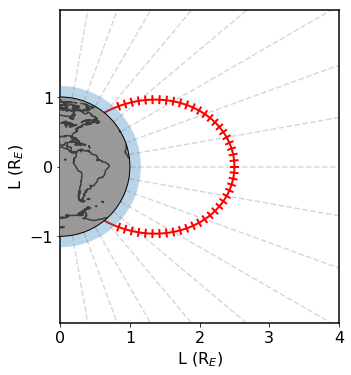

In [40]:
from methods.find_crossings import gen_EA_array

# Plot the Earth's magnetic field

# --------------- Latex Plot Beautification --------------------------
fig_width = 4.5
fig_height = 4.5
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 16,
          'font.size': 16,
          'legend.fontsize': 16,
          'xtick.labelsize': 16,
          'ytick.labelsize': 16,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

# Lvec = np.arange(1.5, 5, 0.5)
Lvec = [2.5]
Lmax = 4


# Generate EA segments:
EA_arr = gen_EA_array(Lvec, 2, 0, datetime.datetime(2010,1,1,0,0,0))
# print EA

fig, ax = plt.subplots(1,1)
[i.set_linewidth(1.5) for i in ax.spines.itervalues()]
# ax.plot(positions[:,0], positions[:,2], linewidth=2)
ax.set_aspect('equal')
ax.set_xlim([0, Lmax])
ax.set_ylim(np.array([-1, 1])*(Lmax + 0.5)/2.)
ax.set_yticks([ -1, 0, 1])
# Draw the earth
# Plot the earth
earth = plt.Circle((0,0),1,facecolor='0.6',alpha=1,edgecolor='k', zorder=100)
iono  = plt.Circle((0,0),1 + 1000./6378.,alpha=0.3, zorder=99)
 
ax.add_patch(earth)                    # The earth (round)
ax.add_patch(iono)
coastpoints = np.vstack([coast['lon']/90. + 0.3, coast['lat']/90.])
coastr = np.linalg.norm(coastpoints, axis=0)
coastmask = (coastr < 1) | (np.isnan(coastr))
ax.plot(coastpoints[0,coastmask], coastpoints[1,coastmask],'k', zorder=101, alpha=0.6)



# ax2=fig.add_axes([0,0.25,0.52,0.5])
# m = Basemap(projection='ortho',lon_0=-105,lat_0=-25,resolution='l',ax=ax2)
# m.bluemarble(scale=.5) # scale=.1 for low resolution

# Plot latitude lines:

for la in np.arange(-90, 91, 10):
    rr = np.array([1,10])
    plt.plot(rr*np.cos(la*D2R), rr*np.sin(la*D2R),'--',color='grey', alpha=0.3)
    plt.plot(-rr*np.cos(la*D2R), rr*np.sin(la*D2R),'--',color='grey', alpha=0.3)

    

# Plot the fieldlines
lam = np.linspace(-80,80,181)
for L in Lvec:
    L_r = L*pow(np.cos(lam*D2R),2)
    Lx  = L_r*np.cos(lam*D2R)
    Ly  = L_r*np.sin(lam*D2R)
    ax.plot( Lx,Ly,color='r',linewidth=2)#,linestyle='dashed')  # Field line
#     ax.plot(-Lx,Ly,color='r',linewidth=2,linestyle='dashed')  # Field line
#     ax.text(L-0.2, 0, '%.1f'%L, size=14)
    
ax.set_xlabel('L (R$_E$)')
ax.set_ylabel('L (R$_E$)')
fig.tight_layout()

# Latitude crossing segments:

for EA in EA_arr:
    for (x, y, dx, dy) in zip(EA['x'],EA['y'], EA['x_unit_vect'], EA['y_unit_vect']):
        x1 = x - dx*0.05
        x2 = x + dx*0.05
        y1 = y - dy*0.05
        y2 = y + dy*0.05
        
        ax.plot([x1, x2],[y1,y2],'r',linewidth=2)
        
fig.savefig('fieldline_with_EA_segments.png',dpi=300)